# Init

In [ ]:
import cv2
import matplotlib.pyplot as plt
from numba import jit
import numpy as np
import seaborn as sns
import skimage

In [ ]:
sns.set(style='dark')
plt.rcParams['figure.constrained_layout.use'] = True
np.set_printoptions(threshold=20, edgeitems=10, linewidth=140, precision=3, suppress=True)

# Task 1: complete implementation of the `warp_inv` so that it supports linear interpolation by passing `interp='linear'`

In [ ]:
def warp_inv(img: np.ndarray, A: np.ndarray, interp: str = 'nearest') -> np.ndarray:
    height, width = img.shape[:2]
    
    # get image corners and transform them
    X = np.array([0., width, width, 0.])
    Y = np.array([0., 0., height, height])
    XY = np.vstack((X, Y, np.ones(4)))
    XY_ = np.dot(A, XY)
    XY_ /= XY_[-1, :]
    ox_, oy_ =  XY_[0, :].min(),  XY_[1, :].min()
    
    # calculate the new size
    width_ = int(XY_[0, :].max() - XY_[0, :].min())
    height_ = int(XY_[1, :].max() - XY_[1, :].min())
    img_ = np.zeros((height_, width_), dtype=img.dtype)
    
    # invert transformation
    A_inv = np.linalg.inv(A)

    # helper function to safely get a value gray[y, x]
    def src_img_at(x, y):
        if 0 <= x < width and 0 <= y < height:
            return img[y, x]
        else:
            return 0
    
    # the main transformation loop
    for y_ in range(height_):
        for x_ in range(width_):
            # inverse transform
            x, y, z = np.dot(A_inv, [x_ + ox_, y_ + oy_, 1.])
            
            # normalize homogennous coordinates
            x /= z
            y /= z

            # interpolation
            if interp == 'nearest':
                x = int(0.5 + x)
                y = int(0.5 + y)    
                img_[y_, x_] = src_img_at(x, y)  # gray_at defined on line 17 of this function
            
            elif interp == 'linear':
                ########################################
                # TODO: implement
                
                
                
                # ENDTODO
                ########################################
            
            else:
                raise ValueError(interp)
    
    return img_

In [ ]:
rgb = cv2.imread('./data/robot.bmp')[..., ::-1]
gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

A_hom = np.array([
    [ 0.9, -0.3, 50.],
    [-0.5,  1.0, 30.],
    [-0.002, -0.0015, 1]
])

gray_hom_nn = warp_inv(gray, A_hom, interp='nearest')
gray_hom_lin = warp_inv(gray, A_hom, interp='linear')

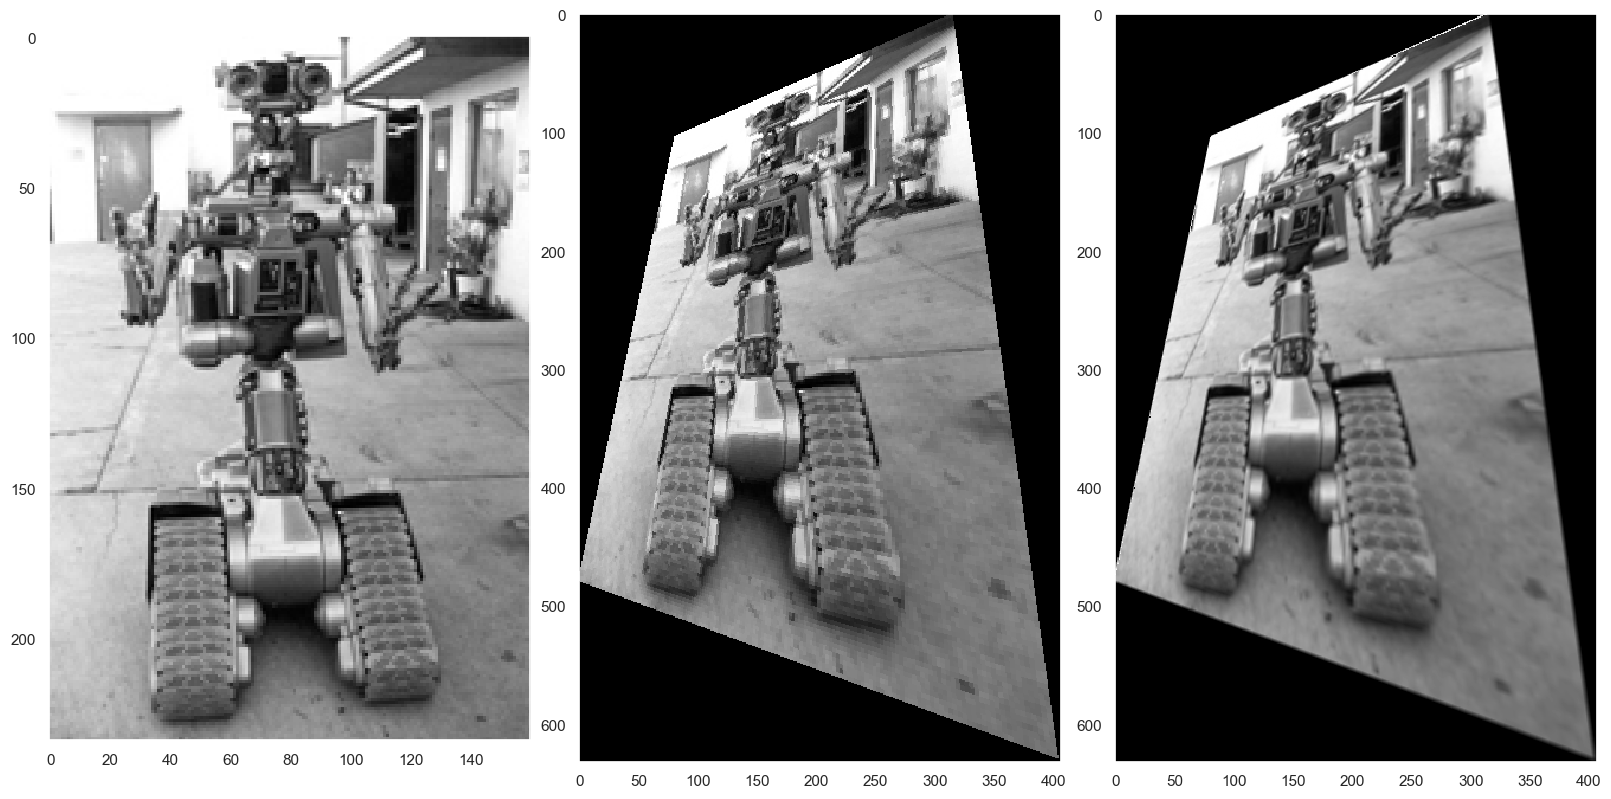

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 16))
axes[0].imshow(gray, cmap='gray', vmin=0., vmax=255, interpolation='none')
axes[1].imshow(gray_hom_nn, cmap='gray', vmin=0, vmax=255, interpolation='none');
axes[2].imshow(gray_hom_lin, cmap='gray', vmin=0, vmax=255, interpolation='none');

# Task 2: rotation around center of the image instead of origin=(0, 0)

Create the matrix `A_rot` (matrix $\bold{A}$ of shape $3 \times 3$) such that the input image is rotated around its center instead of the top-left point. It must work for arbitray angle $\phi$.

*Hint*: You need to set the translation offsets $t_x$ and $t_y$ to correct values.

In [ ]:
rgb = cv2.imread('./data/robot.bmp')[..., ::-1]

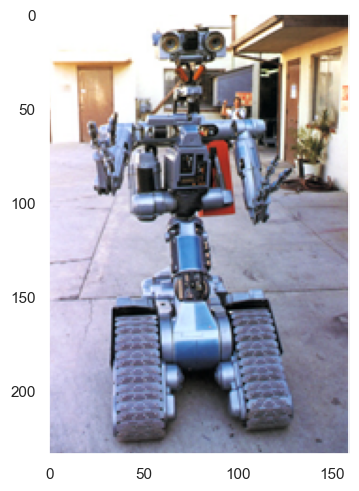

In [ ]:
plt.imshow(rgb);

In [ ]:
phi_rot = 60. / 180. * np.pi

# A_rot = np.array([
#     ...
# ])

# rgb_rot = skimage.transform.warp(...)

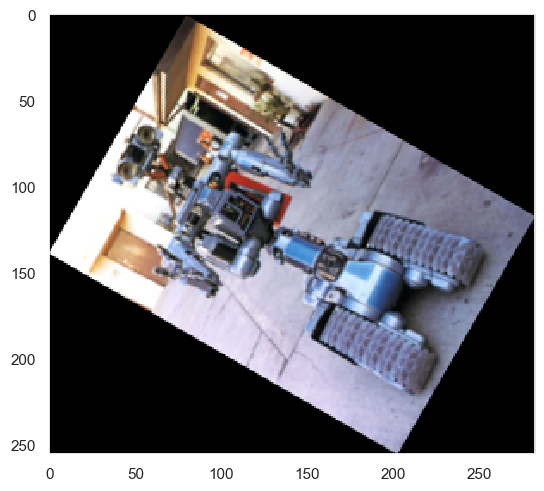

In [ ]:
plt.imshow(rgb_rot, cmap='gray', vmin=0, vmax=255, interpolation='none');

# Task3: Transformation estimation in OpenCV

- Re-implement the example of the region of interest (ROI) extraction using transformation estimation that's in the notebook `geom-transform.ipynb` **using OpenCV**.
- Apply the method to extract the Sudoku grid from the image `data/sudoku-alt3.jpg`.
- Mark the corner points in the image manually.
- The resulting ROI should be a square image with the side length divisible by 9.

*Hint*: you'll probably need the functions `findHomography` and `warpPerspective`.

In [ ]:
rgb = cv2.imread('./data/sudoku-alt3.jpg')[..., ::-1]

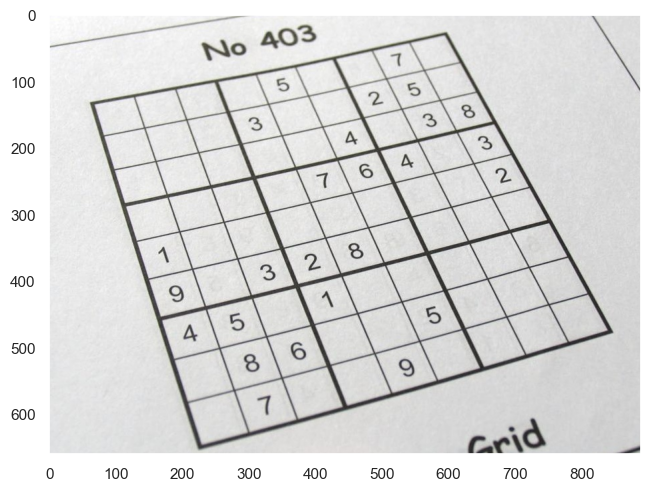

In [ ]:
plt.imshow(rgb);

In [ ]:
# TODO: implement
# ...

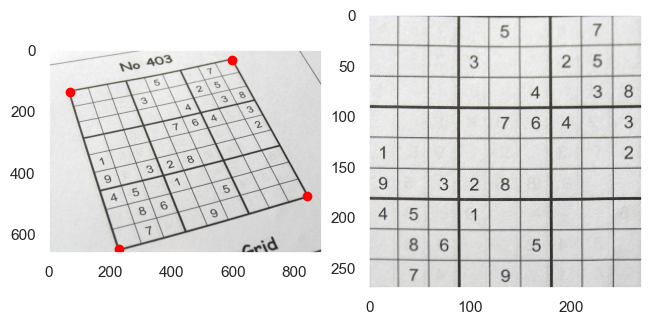

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(rgb)
axes[0].plot(src_xy[:, 0], src_xy[:, 1], 'o', color=(1, 0, 0));
axes[1].imshow(roi);